In [2]:
# Environment Setup
# ----------------------------------------------------------------
# Dependencies
import csv
import pandas as pd
import random
import numpy as np
import string
from faker import Faker
import matplotlib.pyplot as plt
fake = Faker()

# Output File Names
file_output_city_csv = "raw_data/city_data.csv"
file_output_rides_csv = "raw_data/ride_data.csv"

# Generator Conditions (Change as needed)
# ----------------------------------------------------------------
rough_ride_count = 2500
rough_driver_count = 950
city_count = 120
city_types = [
    {
        "type": "Urban",
        "fare_range": (4, 45),
        "percent_of_rides": 0.65,
        "percent_of_drivers": 0.65,
        "percentage_of_cities": 0.55
    },
    {
        "type": "Suburban",
        "fare_range": (12, 50),
        "percent_of_rides": 0.25,
        "percent_of_drivers": 0.25,
        "percentage_of_cities": 0.35
    },
    {
        "type": "Rural",
        "fare_range": (10, 60),
        "percent_of_rides": 0.05,
        "percent_of_drivers": 0.10,
        "percentage_of_cities": 0.15
    }
]

In [3]:
# Create a CSV of city data 
# City | Driver_Count | Type

# List will hold the final set of city data 
cities_data = []

# Calculate the driver count for each city type
for city_type in city_types:
    city_type["total_drivers"] = int(city_type["percent_of_drivers"] * rough_driver_count)
    city_type["city_count"] = int(city_type["percentage_of_cities"] * city_count)
    
    # Use the driver count to create a set number of fake cities each given a random number of drivers
    for city in range(city_type["city_count"]):
        cities_data.append({"city": fake.city(), 
                       "type": city_type["type"], 
                       "driver_count": np.random.randint(1, city_type["total_drivers"] * 0.12)})


# Convert the city data into a DataFrame    
cities = pd.DataFrame(cities_data)

# Export the city data to a csv 
cities.to_csv(file_output_city_csv, index=False)

cities.head()

,city,driver_count,type
0,South Larry,66,Urban
1,Kevinmouth,20,Urban
2,New Patricia,7,Urban
3,West Tonyfurt,32,Urban
4,Port Ryanfurt,58,Urban


In [4]:
# Create a CSV of ride data
# Ride ID | City | Date | Fare | 

# List will hold all the final set of rides
rides = []

# Loop through all city types
for city_type in city_types:
    
    # Determine the total rides for each city type
    city_type["total_rides"] = int(city_type["percent_of_rides"] * rough_ride_count)
    
    # Choose a city from that city type at random to distribute the rides across cities
    for ride in range(city_type["total_rides"]):
        
        # Create a list of dictionaries for each ride
        rides.append({"ride_id": fake.ean13(), 
                      "date": fake.date_time_this_year(), 
                      "city": np.random.choice(cities[cities["type"] == city_type["type"]]["city"]), 
                      "fare": round(np.random.uniform(city_type["fare_range"][0], city_type["fare_range"][1]), 2)})

# Convert the ride list into a data frame
rides = pd.DataFrame(rides)

# Export the ride data to a csv
rides.to_csv(file_output_rides_csv, index=False)

rides.head()

,city,date,fare,ride_id
0,Port Tylerstad,2018-03-25 18:44:35,30.71,3056618134658
1,Lake Lisa,2018-02-20 19:19:02,13.82,1648901125843
2,North Ericburgh,2018-01-23 19:12:07,44.78,7835729399448
3,Hernandezmouth,2018-01-25 19:57:16,5.44,2469935634151
4,Alanmouth,2018-01-18 10:26:11,34.79,1548468113126


In [5]:
rides.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [6]:
# merge data on cities
mergedData = pd.merge(rides, cities, on = 'city', how = 'inner')

#create dataframes using locate for each city type
urbanData = mergedData.loc[mergedData['type'] == 'Urban', :]
ruralData = mergedData.loc[mergedData['type'] == 'Rural', :]
suburbanData = mergedData.loc[mergedData['type'] == 'Suburban', :]

#create Data Frames based on avg fare objects for each city type
urbanAvgFare = pd.DataFrame(urbanData.groupby('city').mean())
ruralAvgFare = pd.DataFrame(ruralData.groupby('city').mean())
suburbanAvgFare = pd.DataFrame(suburbanData.groupby('city').mean())

#using groupby type to created a grouped object based on type
grouped = mergedData.groupby(['type'])

#create driver count variable based on city type
urbanDriverCount = urbanData.groupby('city')['driver_count'].mean()
suburbanDriverCount = suburbanData.groupby('city')['driver_count'].mean()
ruralDriverCount = ruralData.groupby('city')['driver_count'].mean()

# create ride count variable based on city type
urbanTotalRides = urbanData.groupby('city')['ride_id'].count()
suburbanTotalRides = suburbanData.groupby('city')['ride_id'].count()
ruralTotalRides = ruralData.groupby('city')['ride_id'].count()

#create ride count variables based on city type
urbanRideCount = urbanData.groupby('city')['ride_id'].count()
suburbanRideCount = suburbanData.groupby('city')['ride_id'].count()
ruralRideCount = ruralData.groupby('city')['ride_id'].count()

#creating variables for pie charts
totalCityFare = grouped['fare'].sum()
totalRides = grouped['ride_id'].count()
totalDrivers = grouped['driver_count'].sum()

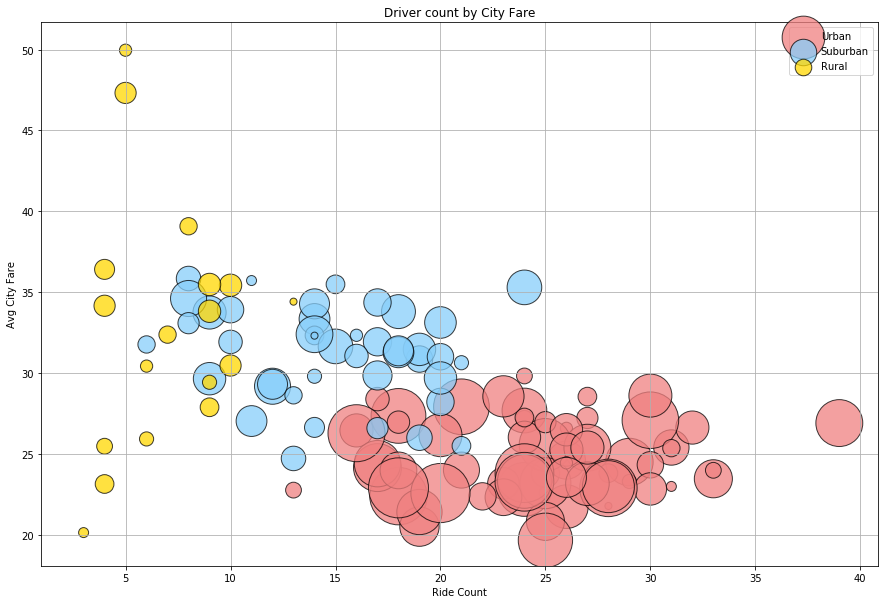

In [11]:
#creating bubble plot, starting with fig size
plt.figure(figsize = (15, 10))

# grid lines
plt.grid()
# scatter plots showing total rides (explanatory variable) vs average fare (independent variable) 
# organized by each city type
plt.scatter(urbanTotalRides, urbanAvgFare['fare'], marker = 'o', facecolors = 'lightcoral', 
            edgecolors = 'black', s = urbanDriverCount * 50, alpha = 0.75)
plt.scatter(suburbanTotalRides, suburbanAvgFare['fare'], marker = 'o', facecolors = 'lightskyblue', 
            edgecolors = 'black', s = suburbanDriverCount * 50, alpha = 0.75)
plt.scatter(ruralTotalRides, ruralAvgFare['fare'], marker = 'o', facecolors = 'gold', 
            edgecolors = 'black', s = ruralDriverCount * 50, alpha = 0.75)
# axes labels, title, and legend
plt.xlabel('Ride Count')
plt.ylabel('Avg City Fare')
plt.title('Driver count by City Fare')
labels = ['Urban', 'Suburban', 'Rural']
plt.legend(labels = labels, loc = 'best')

plt.show()



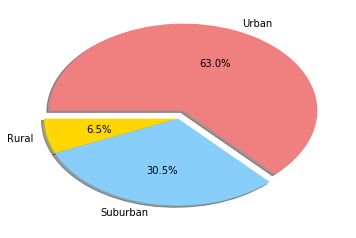

In [12]:
# pie chart info (explode, labels, colors)
explode = [0, 0, 0.1]
labels = ['Rural', 'Suburban', 'Urban']
colors = ['gold', 'lightskyblue', 'lightcoral']

# pie chart showing percent of total city fare by city type
plt.pie(totalCityFare, labels = labels, explode = explode, 
        colors = colors, autopct="%1.1f%%", shadow=True, startangle=180)

plt.show()

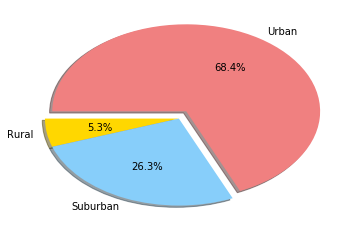

In [13]:
# pie chart showing percent of total rides by city type
plt.pie(totalRides, labels = labels, explode = explode, 
        colors = colors, autopct="%1.1f%%", shadow=True, startangle=180)
plt.show()

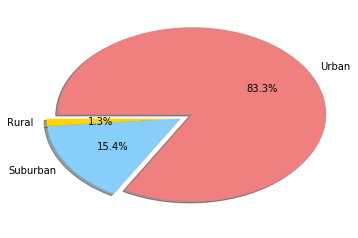

In [14]:
# pie chart showing percent of total drivers by city type
plt.pie(totalDrivers, labels = labels, explode = explode, 
        colors = colors, autopct="%1.1f%%", shadow=True, startangle=180)
plt.show()

In [ ]:
# 3 observable trends seen in the data

# 1. urban drivers tend to get lower fare rides, but a higher volume of rides compared to other city types. Rural
#    drivers get a lower volume of drivers, but get rewarded with higher fare (and probably drive further for it).
# 2. The pie charts help show how many more urban drivers there are, and therefore more total rides and total fare
#    than the otehr city types. This makes sense, since there is higher demand in densily populated areas.
# 3. I computed an (approximate) estimate of the profit for each city type, and as expected Urban drivers make the
#    highest profit (~$625). This explains more concretely why there are so many more drivers in urban cities than others.